In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Create dataset
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 
                'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy',
                'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast',
                'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0,
                   72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0,
                   88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0,
                 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0,
                 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True,
             True, False, True, True, False, False, True, False, True, True, False,
             True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
             'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
             'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}

In [3]:
# Prepare data
df = pd.DataFrame(dataset_dict)
df = pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

In [4]:
# Rearrange columns
column_order = ['sunny', 'overcast', 'rainy', 'Temperature', 'Humidity', 'Wind', 'Play']
df = df[column_order]

In [5]:
# Split features and target
X, y = df.drop('Play', axis=1), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)


In [6]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Predict and evaluate
y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8571428571428571


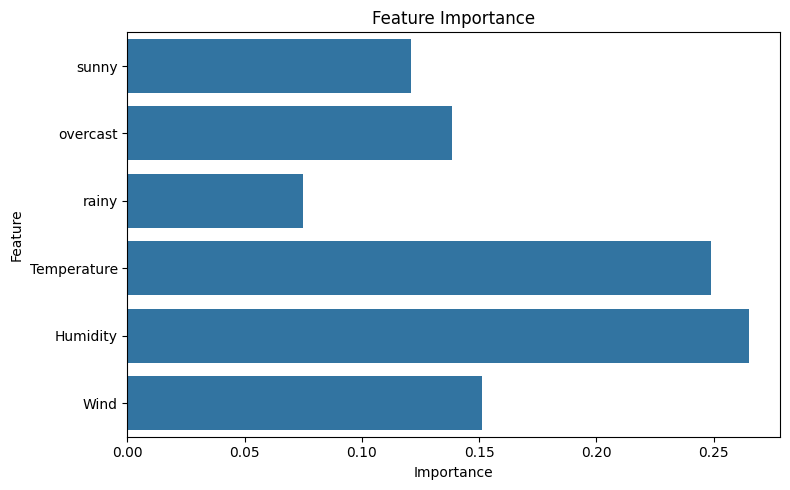

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importances = rf.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


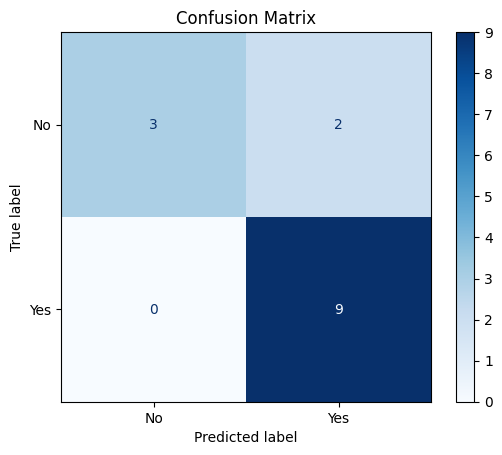

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])

disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


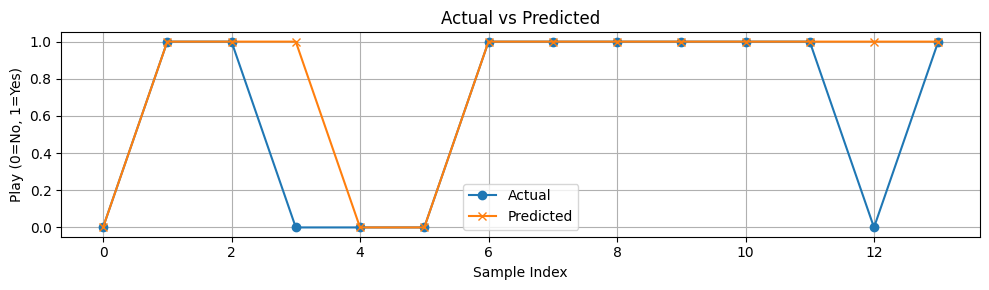

In [10]:
plt.figure(figsize=(10, 3))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred, label="Predicted", marker='x')
plt.legend()
plt.title("Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Play (0=No, 1=Yes)")
plt.grid(True)
plt.tight_layout()
plt.show()


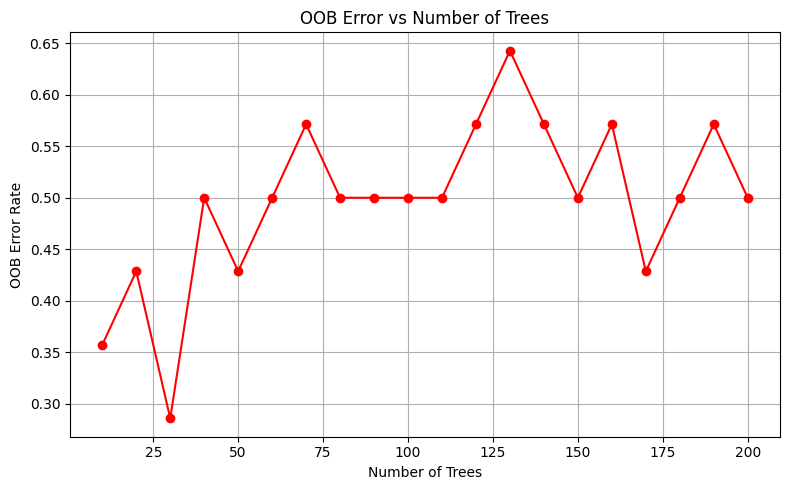

In [11]:
oob_errors = []
tree_counts = range(10, 201, 10)  # try from 10 to 200 trees

for n in tree_counts:
    rf_oob = RandomForestClassifier(
        n_estimators=n,
        oob_score=True,           # enable OOB scoring
        max_features='sqrt',
        random_state=42,
        bootstrap=True            # OOB requires bootstrapping
    )
    rf_oob.fit(X_train, y_train)
    oob_error = 1 - rf_oob.oob_score_
    oob_errors.append(oob_error)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(tree_counts, oob_errors, marker='o', color='red')
plt.title("OOB Error vs Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("OOB Error Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


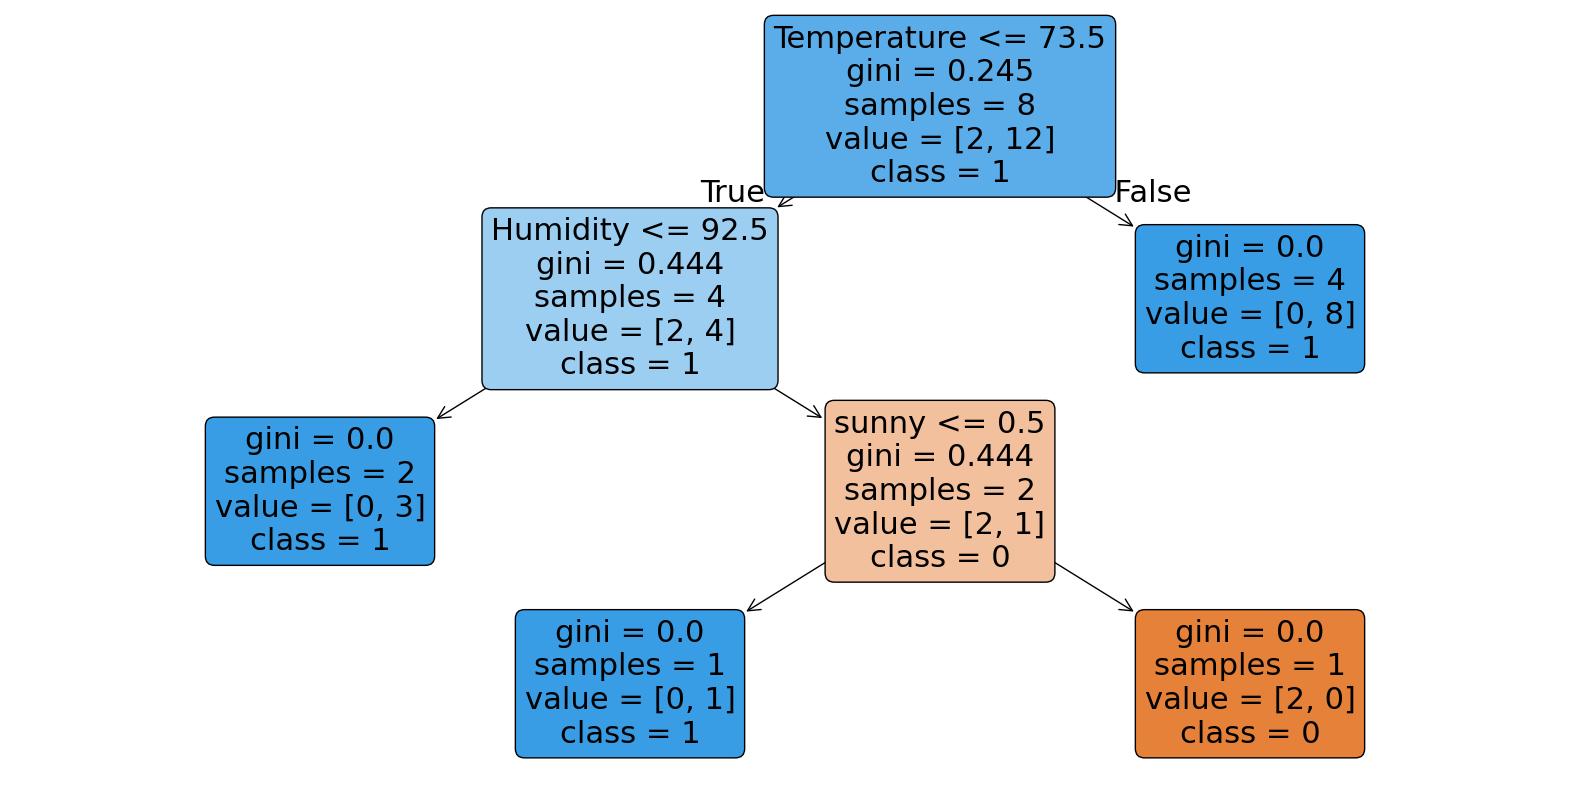

In [14]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    rf.estimators_[0],
    feature_names=X.columns,
    class_names=[str(cls) for cls in rf.classes_],
    filled=True,
    rounded=True
)
plt.show()